In [20]:
import bentoml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.linear_model as skl
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector
import gc

In [2]:
originalData = pd.read_csv('SP_SPX, 30.csv')
rangeInDayList = []

In [3]:
cleanData = originalData.dropna(axis = 1)
cleanData = cleanData.drop('time', axis = 1)
# cleanData = originalData

#pop = originalData[['open', 'high', 'low', 'SMA #1', 'VWAP']]
targetColumn = cleanData['SMA #1'] # SMA 1 will always be the 10 SMA
cleanData = cleanData.drop('SMA #1', axis = 1)

print(cleanData.keys())

Index(['open', 'high', 'low', 'close', 'SMA #2', 'SMA #3', 'VWAP'], dtype='object')


In [4]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
varianceSelections = sel.fit_transform(cleanData)

X = cleanData
y = targetColumn

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = .20, random_state = 100)
forestRegressor = RandomForestRegressor(n_jobs = -1)

forestRegressor.fit(X_Train, Y_Train)
forestRegressor.score(X_Test, Y_Test)
forwardFeatureSelection = SequentialFeatureSelector(forestRegressor,
                                                    k_features = 2,
                                                    forward = True,
                                                    floating= True, 
                                                    verbose = 2,
                                                    cv = 5
                                                    ).fit(X_Train, Y_Train)


[2024-03-04 19:05:46] Features: 1/6 -- score: 0.9978269040832372
[2024-03-04 19:05:51] Features: 2/6 -- score: 0.9921841351227677
[2024-03-04 19:05:56] Features: 3/6 -- score: 0.9931687534168606
[2024-03-04 19:06:01] Features: 4/6 -- score: 0.9928322143770432
[2024-03-04 19:06:06] Features: 5/6 -- score: 0.9919872557065199
[2024-03-04 19:06:11] Features: 6/6 -- score: 0.9913123027363507

In [5]:
forwardFeatureSelection.k_feature_idx_

(0, 1, 3, 4, 5, 6)

In [6]:
featureSelection = []

for idx in forwardFeatureSelection.k_feature_idx_:
    featureSelection.append(cleanData.keys()[idx])
    

In [7]:
forwardFeatureSelection.k_feature_names_

('open', 'high', 'close', 'SMA #2', 'SMA #3', 'VWAP')

In [8]:

X = cleanData[featureSelection]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, train_size = 0.8, test_size = .20, random_state = 100)

X_Train, X_Valid, Y_Train, Y_Valid = train_test_split(X, y, train_size = 0.9, test_size = .10, random_state = 100)

In [9]:
X_Train.shape, Y_Train.shape

((270, 6), (270,))

In [10]:
X_Test.shape, Y_Test.shape

((60, 6), (60,))

In [11]:
model = linear_model.LinearRegression()

In [12]:
model.fit(X_Train, Y_Train)

LinearRegression()

In [13]:
Y_pred = model.predict(X_Test)

In [14]:
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean squared error (MSE): %.2f' % r2_score(Y_Test, Y_pred))

print('Coefficients of determination (R^2):  %.2f' % r2_score(Y_Test, Y_pred))


Coefficients:  [ 0.45258115 -0.26698248 -0.01605537  0.12374686  0.05694418  0.6460289 ]
Intercept:  25.5729343555995
Mean squared error (MSE): 0.95
Coefficients of determination (R^2):  0.95


<Axes: xlabel='SMA #1'>

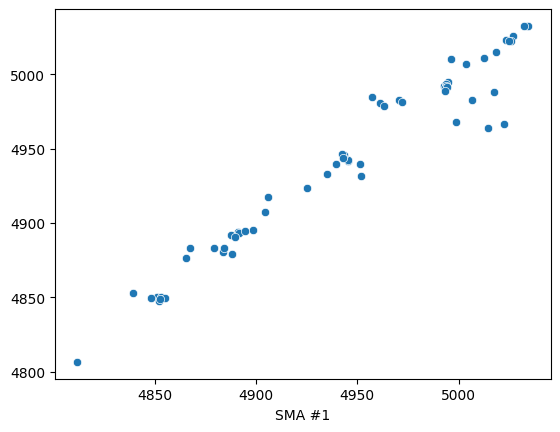

In [15]:
#sns.scatterplot(x = Y_Test, y = Y_pred)

<Axes: xlabel='SMA #1'>

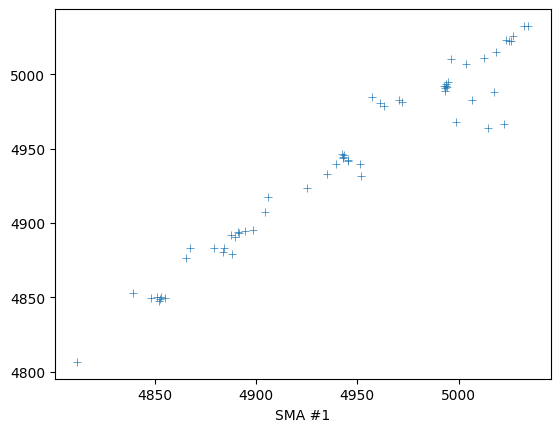

In [16]:
#sns.scatterplot(x = Y_Test, y = Y_pred, marker = '+')

<Axes: xlabel='SMA #1'>

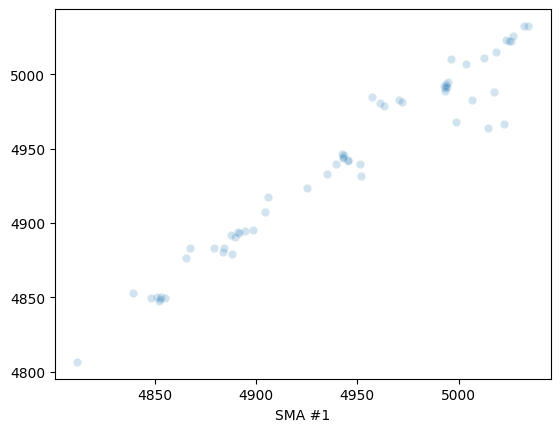

In [17]:
#sns.scatterplot(x = Y_Test, y = Y_pred, alpha = .2)

In [18]:

"""
TO DO:
<COMPLETED>
Within block 5 we will begin by making this model more flexible. To do this we will need to use the indexes of the data instead of hardcoding the title of the columns.
To complete this we will need to run the a for loop locating the index found based on our 
forwardFeatureSelection.k_feature_idx_ and saving it allowing for any data to be imported and used. 
<NOT DONE>
Need to deploy and fine tune if information isn't accurate. 
"""

"\nTO DO:\n<COMPLETED>\nWithin block 5 we will begin by making this model more flexible. To do this we will need to use the indexes of the data instead of hardcoding the title of the columns.\nTo complete this we will need to run the a for loop locating the index found based on our \nforwardFeatureSelection.k_feature_idx_ and saving it allowing for any data to be imported and used. \n<NOT DONE>\nNeed to deploy and fine tune if information isn't accurate. \n"

In [19]:
model.predict(X_Test)

array([5032.31469288, 4932.7334148 , 5023.33181247, 4994.54049561,
       4980.48441091, 4917.3711978 , 4882.7834247 , 4907.04368353,
       4850.09527516, 4982.46893884, 4941.83225538, 4853.04895667,
       5006.93610174, 4991.88761643, 4942.12757376, 4850.01877695,
       5025.51006193, 5022.48745533, 4880.63978567, 4982.94987019,
       4993.50090667, 4945.64677506, 4931.22519663, 4939.3127421 ,
       5011.00971372, 4944.2911514 , 4992.34781179, 4990.60016042,
       4893.6428273 , 4946.4939568 , 4963.91193766, 4943.3566222 ,
       4849.16764766, 5032.52641476, 4966.22389237, 4939.4844849 ,
       5010.03747217, 4895.05112964, 4879.13112868, 4981.082062  ,
       4893.54318331, 4991.61742708, 4883.15695543, 4876.23629649,
       4894.28316371, 4988.06244052, 4988.79272303, 4849.55265033,
       4883.06252131, 4984.55903957, 4891.7841345 , 5022.64039893,
       4806.47149876, 4847.24870371, 4967.56292774, 4923.38529721,
       4978.54356911, 4848.89408219, 5014.86925968, 4890.23281

In [23]:
saved_model = bentoml.sklearn.save_model("SMA_10_prediction", model)

Converting 'SMA_10_prediction' to lowercase: 'sma_10_prediction'.


In [24]:
print(f'Model Saved: ', {saved_model})

Model Saved:  {Model(tag="sma_10_prediction:x6ezjfg2qwa4sqfq", path="C:\Users\Steven\bentoml\models\sma_10_prediction\x6ezjfg2qwa4sqfq\")}
